# IDS 6 - Networking In Python


## Today's agenda
* Tuples, dictionaries and optional input arguments for functions
* Networking
* UDP and TCP in Python
* JSON (JavaScript Object Notation)
* Web APIs (HTTP GET)

### Learning goals today
* Stronger Python skills
    * Especially dictionaries will become important!
* Somewhat of an understanding of how to get data from HTTP connection.
* Storing and handling JSON in files!
* Interaction with web APIs


* Dip your feet in HTTP get requests
* handling JSON files (local and through end-point)
* Plenty of exercises!

## More Python knowledge!
Tuples and optional input arguments to functions!

_Alot of the concepts presented here can also be found in [Automate The Boring Stuff](https://automatetheboringstuff.com/chapter4/)_

### Tuples!
A _tuple_ is a type of data in Python, which is very similar to lists. Instead of using square brackets ```[]```, we used parentheses ```()``` when creating a tuple.
```python
test = (5, 0, 2)
hello = ('Cool String', 0.01, 25, [2,2]) # can hold different kinds of data types
```

Unlike lists, tuples are **immutable**. This means that their values cannot be modified, appended or removed.

In [ ]:
test = (5, 0, 2)
test[0] = 1 # will throw a TypeError

If we wish to do so, we can convert tuples to lists and vice versa.
```python
tuple([2,5,2]) # convert list to tuple
list(('one string', 'two string')) # convert tuple to list
```

#### When to use tuples?
When we want data to not be mutable and when it makes sense to structure data this way. An example could be first and last name:
```python
full_name = ('Frederik', 'Juutilainen')
print(f'My last name is {full_name[1]}')
```
or coordinates:

In [ ]:
ruc_coordinates = (55.65315552816671, 12.14078009885621) # lat, lon
norrebro_coordinates = (55.69442365844815, 12.548895741456962) # lat, lon

# PIP
**P**acket **I**nstaller for **P**ython
```
pip3 install requests
```

In [ ]:
import geopy.distance # pip3 install geopy
ruc_coordinates = (55.65315552816671, 12.14078009885621) # lat, lon
norrebro_coordinates = (55.69442365844815, 12.548895741456962) # lat, lon
dist = geopy.distance.distance(ruc_coordinates, norrebro_coordinates).km
print(f'Distance from RUC to Nørrebro is {dist:.1f} km')

Mental exercises! Can you think of other forms of data or information that would represented well with a tuple?

### Optional input parameters and method overloading
_Tons of good points and examples to be found in [Automate the Boring stuff](https://automatetheboringstuff.com/2e/chapter3/)_

In Java, arguments to functions are defined by their position in the function call.

```java
public static void printGreeting(String firstName, String lastName){
    System.out.print("Hello " + firstName + " " + lastName);
}
```

This is often also the case in Python, as we can remember with e.g. the ```random.randint(1,5)```-function. Here the first argument $1$ is the lower end of the range while $5$ is the upper end. We can however also use _keyword arguments_ and these are typically used when working with optional parameters.

If we wanted the previous JAVA example to work with either only firstName or first and last name, we would have to overload the function.

```java
public static void printGreeting(String firstName){
    System.out.print("Hello " + firstName);
}

public static void printGreeting(String firstName, String lastName){
    System.out.print("Hello " + firstName + " " + lastName);
}
```

#### Using optional input parameters in Python
An example of using an optional input parameter can be found in the ```print()```-function, were we can use the ```end```-keyword argument to decide what follows a string.

```
Print objects to the text stream file, separated by sep and followed by end. sep, end, file and flush, if present, must be given as keyword arguments.
```
_[Python3 "print()"-documentation](https://docs.python.org/3/library/functions.html#print)_

In [ ]:
print('Hello', end='')
print('World')

##### Creating a function with an optional input parameter

In [ ]:
def printGreeting(name, professor=False):
    if professor:
        name = 'Dr. ' + name
    print(f'Hello {name}!')
printGreeting('Frederik')
printGreeting('Henning', professor=True) 

This allows us to avoid writing many versions of the "same" function, but handle the logic internally within a function.

#### Exercise!
* Write a function `get_numbers` which returns a list of all numbers from 1 to 25. The function should have the optional input argument ```omit```, which is a tuple of numbers that should be removed from the returned list. Tip: iterate through the tuple and use `remove`.
* Bonus: make sure the function does not crash if the ```omit```-parameter is not a tuple.
```python
if type(omit) is not tuple
```

### [Dictionaries](https://docs.python.org/3/tutorial/datastructures.html#dictionaries)
* Dictionaries are collections that are sets of _key_ / _value_ pairs.
* Keys can be any immutable type; strings and numbers can always be keys.
* Values can be simple or complex data types or containers.
* We use curly brackets `{ }` to create a list.

In [ ]:
a_dict = {"a": 2, "b": 2, "c": 3} # a dictionary is created
print(a_dict["b"]) # accessing value at key "b"

In [ ]:
a_dict["d"] = 0 # inserting new element in dict
print(a_dict)
del a_dict["b"] # delete
print(a_dict)

We can also nest dictionaries for even more complex operations.

In [ ]:
en_de = {"red" : "rot", "green" : "grün", "blue" : "blau", "yellow":"gelb"}
de_fr = {"rot" : "rouge", "grün" : "vert", "blau" : "bleu", "gelb":"jaune"}
de_tr = {"rot": "kırmızı", "grün": "yeşil", "blau": "mavi", "gelb": "jel"}
en_es = {"red" : "rojo", "green" : "verde", "blue" : "azul", "yellow":"amarillo"}

dictionaries = {"en_de" : en_de, "de_fr" : de_fr, "de_tr": de_tr, "en_es": en_es}

In [ ]:
# how do I find translate rot from German to Turkish?

# Sending and receiving UDP and TCP in Python

**Recap:**
* In networking we're breaking down file transfers in smaller packets.
    * In theory we could stream entire files, but that would clog the network. Instead we break it up and _packet switching_ ensures that multiple computers can communicate simultaneously.
* In networking we often decide between using **TCP** and **UDP**:
    * _TCP_ is **reliable** (ensures that packets arrive), **ordered** (packets are sent in sequence) and **"heavyweight"** (multiple packets sent before any user data is sent)
    * _UDP_ is **unreliable** (we don't know if packets arrive), **unordered** (order of receival cannot be ensured) and **lightweight** (Very simple transport protocol).
* UDP is good for time sensitive uses, where waiting for packages is not an option.
    
-- [wiki (TCP & UDP comparison](https://en.wikipedia.org/wiki/User_Datagram_Protocol#Comparison_of_UDP_and_TCP)

In [ ]:
# udp_sender.py
import socket 
UDP_IP = "127.0.0.1"
UDP_PORT = 7007
MESSAGE = b"Isn't this exiting" # notice that 'b' converts it from str to bytes
 
sock = socket.socket(socket.AF_INET, # Internet
socket.SOCK_DGRAM) # UDP
sock.sendto(MESSAGE, (UDP_IP, UDP_PORT));

```python
# udp_receiver.py
import socket

UDP_IP = "127.0.0.1"
UDP_PORT = 5005

sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM) # UDP
sock.bind((UDP_IP, UDP_PORT))

while True:
    data, addr = sock.recvfrom(1024) # buffer size is 1024 bytes
    print("received message: %s" % data)

```

### TCP example

```python
# tcp_client.py
import socket

HOST = '127.0.0.1'  # The server's hostname or IP address
PORT = 9009        # The port used by the server

with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
    s.connect((HOST, PORT))
    while True:
        data = s.recv(1024)
        s.sendall(b'Hello, world')
        print('Received', repr(data)) # repr returns a str-representation of the data object
```

```python
# tcp_server.py
import socket

HOST = '127.0.0.1'  # Standard loopback interface address (localhost)
PORT = 9009        # Port to listen on (non-privileged ports are > 1023)

with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
    s.bind((HOST, PORT))
    s.listen()
    conn, addr = s.accept()
    with conn:
        print('Connected by', addr)
        while True:
            data = conn.recv(1204)
            conn.sendall(b'ECHO ' + data)
```

### Common issues with clients!
1. When listening in a `while`-loop we block other elements of the program. We therefore need to use multi-treaded programming, which we will cover later!
2. If you do not close a server correctly, it might block the port for use. With a few terminal commands we can find and stop these processes.

### Fast hack for killing processes locking up a specific port
On macOS we can open the terminal and input the following command. Replace _PORT_NUMBER_ with the port number.
```
sudo lsof -i :PORT_NUMBER
```
If a process is found, we can use the the process identifier (pid).
```
COMMAND     PID                USER   FD   TYPE             DEVICE SIZE/OFF NODE NAME
python3.8 65683 frederikjuutilainen    3u  IPv4 0x27c268ecd189636d      0t0  UDP localhost:6565
```

Note the PID and input it in the following command:
```
kill -9 <PID>
```

### Same process on Windows
Found on [stackoverflow](https://stackoverflow.com/a/39633428).

1. Open cmd.exe
2. Insert ```netstat -ano | findstr :<PORT>```
3. Locate the PID and insert in ```taskkill /PID <PID> /F```

##### Recap!
* UDP and TCP communication is luckily possible in Python!
* They send packets, which are breaking up files in smaller chunks.
* Deciding between TCP / UDP often comes down to seeing if the application is time-sensitive in which case UDP is better but less reliable!

## JSON

https://raw.githubusercontent.com/lutangar/cities.json/master/cities.json

* JSON ("Jay-Son") is __J__ava __S__cript __O__bject __N__otation.
* Standard file format used to store and trasmit data.
* Human-readable
* Derived from JavaScript but now language independent.
* Encoded in [UTF-8](https://en.wikipedia.org/wiki/UTF-8#Examples)

```javascript
{
  "data": [{
    "type": "articles",
    "working": false,
    "attributes": {
      "title": "JSON:API paints my bikeshed!",
      "body": "The shortest article. Ever."
    }
  }],
  "included": [
    {
      "type": "people",
      "id": 42,
      "attributes": {
        "name": "John"
      }
    }
  ]
};
```

### JSON datatypes
_Source: [wikipedia](https://en.wikipedia.org/wiki/JSON#Syntax)_

* Number: no distinction between integer and floating-point.
* String: a sequence of zero or more Unicode characters. ```"text"```
* Boolean: either of the values ```true``` or ```false```
* Array: an ordered list of zero or more values, each of which may be of any type. ```[1,2, "test"]```
* Object: a collection of name–value pairs where the names (also called keys) are strings. Objects are intended to represent associative arrays,[2] where each key is unique within an object.
* ```null```: an empty value, using the word null

* Number: a signed decimal number that may contain a fractional part and may use exponential E notation, but cannot include non-numbers such as NaN. The format makes no distinction between integer and floating-point.
* String: a sequence of zero or more Unicode characters. Strings are delimited with double-quotation marks and support a backslash escaping syntax.
* Boolean: either of the values ```true``` or ```false```
* Array: an ordered list of zero or more values, each of which may be of any type. Arrays use square bracket notation with comma-separated elements.
* Object: a collection of name–value pairs where the names (also called keys) are strings. Objects are intended to represent associative arrays,[2] where each key is unique within an object.

### Working with JSON in Python
JSON as inline String

In [ ]:
import json

# some JSON:
x =  '{ "name":"Frederik", "city":"Copenhagen", "Number of toes": "10"}' # JSON as string

# parse x:
y = json.loads(x) # as dict

# the result is a Python dictionary:
print(y["city"]) 

We can work with Jupyter code cells in VS Code. [link](https://code.visualstudio.com/docs/python/jupyter-support)

This allows us to e.g. execute code cells and inspect variables. You can start code cells by inserting ```#%%%``` and executing each cells by pressing ```cmd + enter ``` (macOS) or ```ctrl + enter``` (Windows).

```python
#%%
print('Hello, World')
```

#### Demo!

Notebooks are extremely useful for developing, debugging and communicating data.

### Loading and saving from JSON from file

In [ ]:
# importing the module 
import json 
    
# Opening JSON file 
# cities.json download from https://github.com/lutangar/cities.json/blob/master/cities.json or moodle
with open('data/cities.json', encoding='utf8') as json_file: 
    cities = json.load(json_file)
    
# saving to JSON
#with open('data/output.json', 'w') as file_out:
#    json.dump(cities , file_out)

### JSON exercises
_Using [cities dataset](https://github.com/lutangar/cities.json)_ (can also be found on moodle)
* Make a list of cities in Sweden (SE) and [sort by name](https://stackoverflow.com/a/73050).
* Make a list of cities that end in "ville" and sort by country code.
* Make a list of all cities closer than 500 km to Paris (FR) and insert distance to Paris in each dict.
    * Tip 1: use the calculate distance method from earlier in the slides
    * Tip 2: experiment on sliced subset e.g. ```cities[:50]``` to save time
    * You should get 13580 cities including Paris it self
* Find the city that's the furthest away from Banket (Zimbabwe / ```ZW```).
    * Result should be "Leilani Estates"
    
__Remember to save your solutions!__ _Bonus points for saving results as JSON file._

## Web APIs
* What is an API?
* What is a web API?
* HTTP request
* HTTP request in Python

An application programming interface (API), is a computing interface that defines interactions between multiple software components.

A web API is an interface which has one or more endpoints - usually accessed through HTTP.

### HTTP requests
> HTTP defines a set of request methods to indicate the desired action to be performed for a given resource. Although they can also be nouns, these request methods are sometimes referred to as HTTP verbs.
> 
> -- <cite>[Mozilla](https://developer.mozilla.org/en-US/docs/Web/HTTP/Methods)</cite>

Some common HTTP requests include:
###### GET
The GET method requests a representation of the specified resource. Requests using GET should only retrieve data.
######  POST
The POST method is used to submit an entity to the specified resource, often causing a change in state or side effects on the server.
###### PUT
The PUT method replaces all current representations of the target resource with the request payload.
###### DELETE
The DELETE method deletes the specified resource.

If we want to access information stored on the internet, the [Requests](https://requests.readthedocs.io/en/master/)-module allows us to do that easily.

### HTTP request in python

In [4]:
import requests
# getting HTML
r = requests.get('https://ruc.dk/')
r.text; # HTML code

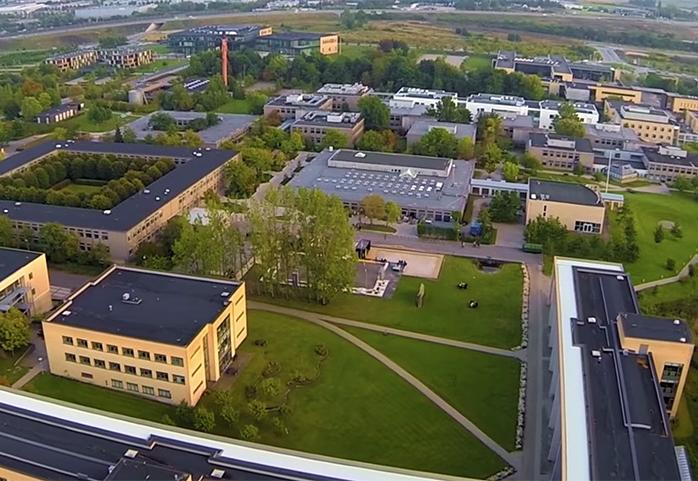

In [5]:
# Reading image
from PIL import Image # pip3 install Pillow

url = 'https://ruc.dk/sites/default/files/styles/footer_map_image/public/2020-12/campus_overview.jpg?itok=D26B1wen'
im = Image.open(requests.get(url, stream=True).raw)
im

### HTTP requests on API
1. Find API
2. Read documentation
3. Create user with authentication (a must in some cases)
4. HTTP requests using ```requests```

#### Example - Weather
https://www.metaweather.com/api/

##### Location Search
**URL** ```/api/location/search/?query=(query)``` or ```/api/location/search/?lattlong=(latt),(long)```

**Arguments** Either query or lattlong need to be present.

**query** Text to search for.

**latlong** Coordinates to search for locations near. Comma separated lattitude and longitude e.g. "36.96,-122.02". 

#### Response Fields
|Field|Type|Unit|Description|
|--- |--- |--- |--- |
|title|string||Name of the location|
|location_type|string|(City|Region / State / Province|Country|Continent)||
|latt_long|floats, comma separated|||
|woeid|integer||Where On Earth ID|
|distance|integer|Metres|Only returned on a lattlong search|


Examples
*   [/api/location/search/?query=san](https://www.metaweather.com/api/location/search/?query=san)
*   [/api/location/search/?query=london](https://www.metaweather.com/api/location/search/?query=london)
*   [/api/location/search/?lattlong=36.96,-122.02](https://www.metaweather.com/api/location/search/?lattlong=36.96,-122.02)
*   [/api/location/search/?lattlong=50.068,-5.316](https://www.metaweather.com/api/location/search/?lattlong=50.068,-5.316)

In [ ]:
import requests

ruc_coordinates = (55.65315552816671, 12.14078009885621) # lat, lon

# defining a params dict for the parameters to be sent to the API 
ruc_coordinates = (55.65315552816671, 12.14078009885621) # lat, lon

# format as comma separated lattitude and longitude
ruc_coordinates_formatted = str(ruc_coordinates).strip('(').strip(')')
payload = {'lattlong': ruc_coordinates_formatted}
  
# sending get request and saving the response as response object 
url = "https://www.metaweather.com/api/location/search/"
r = requests.get(url = "https://www.metaweather.com/api/location/search/", params = payload) 
  
# extracting data in json format 
response = r.json() 
response

In [ ]:
# sending get request and saving the response as response object 
params = {'query': 'copenhagen'}
r = requests.get(url = "https://www.metaweather.com/api/location/search/", params = params) 
  
# extracting data in json format 
response = r.json() 

In [ ]:
r = requests.get(url = "https://www.metaweather.com/api/location/" + str(response[0]['woeid'])) 
  
# extracting data in json format 
response = r.json() 
response

### Exercise
1. Find interesting API [here](https://mixedanalytics.com/blog/list-actually-free-open-no-auth-needed-apis/), [here](https://learn.vonage.com/blog/2021/03/15/the-ultimate-list-of-fun-apis-for-your-next-coding-project/) or [here!](https://betterprogramming.pub/a-curated-list-of-100-cool-and-fun-public-apis-to-inspire-your-next-project-7600ce3e9b3)
2. Get and interpret data using ```requests```and the dictionary and string techniques we have learned
3. _Ideas and examples:_
    * Create a list of tuples with US states and population count. Sort by most inhabitants - [API](https://datausa.io/about/api/)
    * Let the user input the name of a TV show and return the genres - [API](https://www.tvmaze.com/api)
    * Make a chat bot that tells jokes - [API](https://sv443.net/jokeapi/v2/)
    * Let the user input the name of a country and return all universities in that city - [API](http://universities.hipolabs.com/search?country=Denmark)